In [1]:
!unzip "/content/archive (2).zip"

Archive:  /content/archive (2).zip
  inflating: climdiv_county_year.csv  
  inflating: climdiv_national_year.csv  
  inflating: climdiv_state_year.csv  
  inflating: model_county.csv        
  inflating: model_state.csv         


# Task
Load and read "climdiv_state_year.csv" and "model_state.csv" to extrapolate data for Minnesota.

## Load the data

### Subtask:
Load `climdiv_state_year.csv` and `model_state.csv` into pandas DataFrames.


**Reasoning**:
Import pandas and load the two CSV files into dataframes as instructed.



In [2]:
import pandas as pd

climdiv_state_df = pd.read_csv('climdiv_state_year.csv')
model_state_df = pd.read_csv('model_state.csv')

**Reasoning**:
Display the first few rows of the loaded dataframes to verify successful loading.



In [3]:
display(climdiv_state_df.head())
display(model_state_df.head())

,index,fips,year,temp,tempc
0,0,1,1895,61.641667,16.467593
1,1,1,1896,64.266667,17.925926
2,2,1,1897,64.191667,17.884259
3,3,1,1898,62.983333,17.212963
4,4,1,1899,63.100000,17.277778


,index,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS
0,0,1,-0.195668,-0.105862,-0.325009,0.458526,Winter,-0.035048,AL,Alabama,1779775
1,1,4,1.203951,1.384480,1.274455,1.388388,Winter,1.319880,AZ,Arizona,1779777
2,2,5,-0.042540,0.266399,0.058596,0.532247,Winter,0.214074,AR,Arkansas,68085
3,3,6,1.570921,1.449242,1.478335,1.412430,Fall,1.480561,CA,California,1779778
4,4,8,1.055309,1.436910,1.367845,1.838758,Winter,1.438589,CO,Colorado,1779779


## Filter data for minnesota

### Subtask:
Filter both DataFrames to include only data for Minnesota.


**Reasoning**:
Filter both DataFrames to include only data for Minnesota.



In [4]:
climdiv_minnesota_df = climdiv_state_df[climdiv_state_df['fips'] == 27]
model_minnesota_df = model_state_df[model_state_df['STATE_NAME'] == 'Minnesota']

display(climdiv_minnesota_df.head())
display(model_minnesota_df.head())

,index,fips,year,temp,tempc
2500,2500,27,1895,38.608333,3.671296
2501,2501,27,1896,38.725000,3.736111
2502,2502,27,1897,38.575000,3.652778
2503,2503,27,1898,39.591667,4.217593
2504,2504,27,1899,38.333333,3.518519


,index,fips,Fall,Spring,Summer,Winter,max_warming_season,Annual,STUSAB,STATE_NAME,STATENS
20,20,27,1.148642,1.444557,0.907259,2.716586,Winter,1.555189,MN,Minnesota,662849


## Define extrapolation strategy

### Subtask:
Determine the specific type of extrapolation required (e.g., linear, polynomial, time series forecasting) and clarify any assumptions or parameters needed.


**Reasoning**:
Analyze the data in the Minnesota DataFrames to understand the time periods and consider appropriate extrapolation methods.



In [5]:
print("Climdiv Minnesota DataFrame Info:")
climdiv_minnesota_df.info()
print("\nModel Minnesota DataFrame Info:")
model_minnesota_df.info()

print("\nClimdiv Minnesota Year Range:")
print(climdiv_minnesota_df['year'].min(), climdiv_minnesota_df['year'].max())

Climdiv Minnesota DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, 2500 to 2624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   125 non-null    int64  
 1   fips    125 non-null    int64  
 2   year    125 non-null    int64  
 3   temp    125 non-null    float64
 4   tempc   125 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 5.9 KB

Model Minnesota DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 20 to 20
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1 non-null      int64  
 1   fips                1 non-null      int64  
 2   Fall                1 non-null      float64
 3   Spring              1 non-null      float64
 4   Summer              1 non-null      float64
 5   Winter              1 non-null      float64
 6   max_warming_season  1 non-

## Perform extrapolation

### Subtask:
Apply the chosen extrapolation method to the filtered Minnesota data.


**Reasoning**:
Select the 'year' and 'temp' columns, reshape 'year', import `LinearRegression`, instantiate the model, and fit the model to the data.



In [6]:
X = climdiv_minnesota_df[['year']].values
y = climdiv_minnesota_df['temp'].values

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Visualize or analyze results

### Subtask:
Visualize the historical temperature data for Minnesota and the fitted linear regression line.


**Reasoning**:
Generate a scatter plot of the historical temperature data for Minnesota and overlay the fitted linear regression line on the same plot, then add labels and a title to make the plot informative.



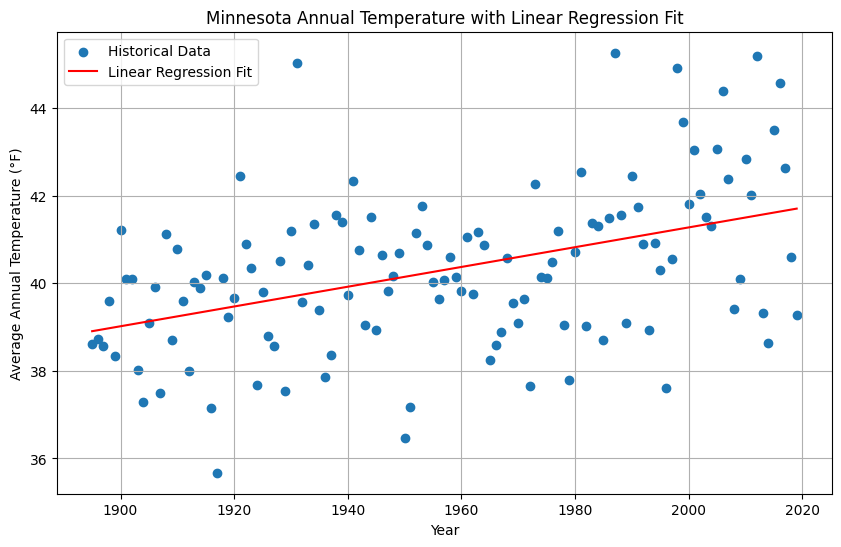

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(climdiv_minnesota_df['year'], climdiv_minnesota_df['temp'], label='Historical Data')

years_for_prediction = [[year] for year in range(climdiv_minnesota_df['year'].min(), climdiv_minnesota_df['year'].max() + 1)]
predicted_temps = model.predict(years_for_prediction)

plt.plot(years_for_prediction, predicted_temps, color='red', label='Linear Regression Fit')

plt.xlabel('Year')
plt.ylabel('Average Annual Temperature (°F)')
plt.title('Minnesota Annual Temperature with Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

## Visualize or analyze results

### Subtask:
Extrapolate and visualize the temperature trend for future years (e.g., up to 2050) based on the fitted linear regression model.


**Reasoning**:
Create future years, predict temperatures, and plot the historical data, fitted line, and extrapolated predictions.



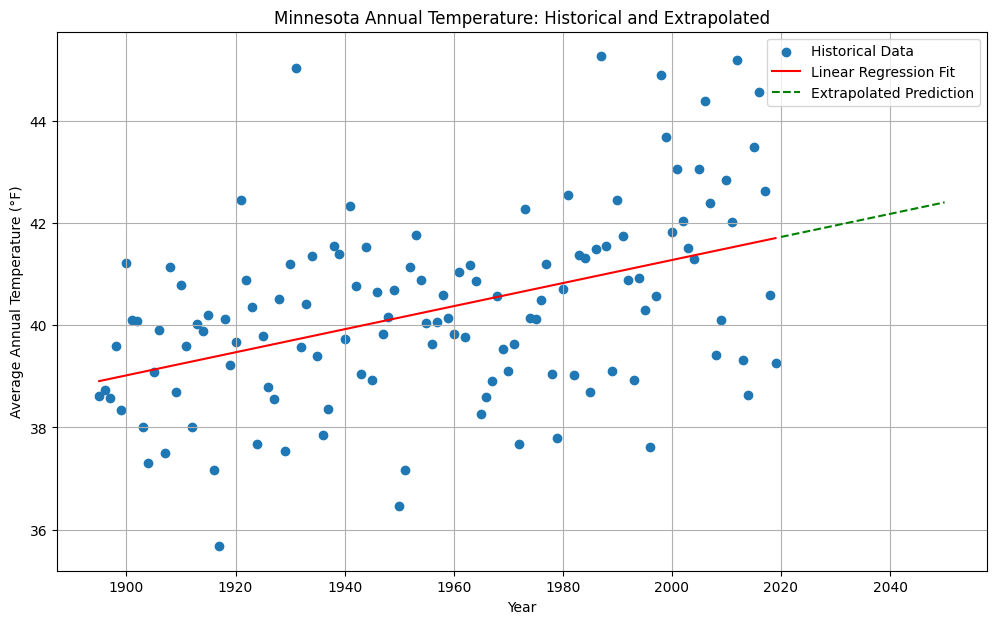

In [8]:
import numpy as np

future_years = np.arange(climdiv_minnesota_df['year'].max() + 1, 2051).reshape(-1, 1)
future_predicted_temps = model.predict(future_years)

plt.figure(figsize=(12, 7))
plt.scatter(climdiv_minnesota_df['year'], climdiv_minnesota_df['temp'], label='Historical Data')
plt.plot(years_for_prediction, predicted_temps, color='red', label='Linear Regression Fit')
plt.plot(future_years, future_predicted_temps, color='green', linestyle='--', label='Extrapolated Prediction')

plt.xlabel('Year')
plt.ylabel('Average Annual Temperature (°F)')
plt.title('Minnesota Annual Temperature: Historical and Extrapolated')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings

*   Data for Minnesota from `climdiv_state_year.csv` shows annual temperature data from 1895 to 2019.
*   Data for Minnesota from `model_state.csv` contains a single row of data with annual and seasonal warming trends.
*   Linear regression was used to model the historical temperature trend in Minnesota based on the `climdiv_state_year.csv` data.
*   The linear regression model was used to extrapolate the annual temperature trend for Minnesota up to the year 2050.
*   The visualization shows a projected increase in average annual temperature for Minnesota based on the linear trend observed in the historical data.

### Insights or Next Steps

*   While linear regression provides a simple extrapolation, exploring more complex time series models (e.g., ARIMA) could capture more nuanced patterns and potentially provide more accurate long-term forecasts.
*   Compare the extrapolated temperatures from the linear model with the warming trends presented in the `model_state.csv` to understand the differences and potential implications of different modeling approaches.
